In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.impute import SimpleImputer
from fun import *

In [2]:
airbnb = pd.read_csv("data/train.csv")

c:\users\zhaow\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\Users\zhaow\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhaow\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

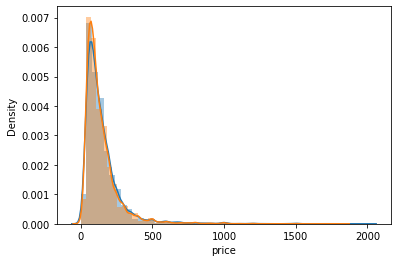

In [3]:
sns.distplot(airbnb[airbnb["interaction"].isnull()].price)
sns.distplot(airbnb[airbnb["interaction"].notnull()].price)

C:\Users\zhaow\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhaow\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

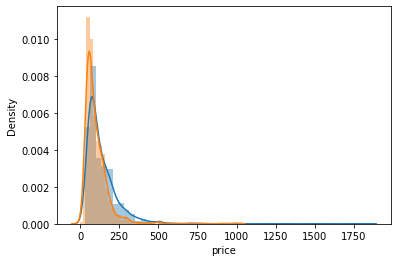

In [68]:
sns.distplot(airbnb[airbnb["host_neighbourhood"]=="Williamsburg"].price)
sns.distplot(airbnb[airbnb["host_neighbourhood"] == "Bedford-Stuyvesant"].price)

In [12]:
grouped_veri = airbnb[["host_verifications", "price"]]
grouped_veri["host_verifications"] = grouped_veri["host_verifications"].apply(lambda x: x.count(",")+1 if len(x)>4 else 0)
grouped_veri = grouped_veri.groupby("host_verifications")["price"].mean()
grouped_veri

C:\Users\zhaow\AppData\Local\Temp/ipykernel_24776/3869303792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_veri["host_verifications"] = grouped_veri["host_verifications"].apply(lambda x: x.count(",")+1 if len(x)>4 else 0)


host_verifications
0     131.071429
1     144.682390
2     155.266805
3     139.205459
4     141.387009
5     145.927369
6     144.856243
7     146.184154
8     149.979359
9     141.554726
10    139.390029
11    173.453125
12    171.416667
Name: price, dtype: float64

<AxesSubplot:xlabel='host_id', ylabel='price'>

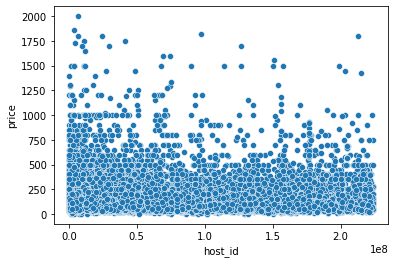

In [72]:
sns.scatterplot(x=airbnb.host_id, y=airbnb.price)

In [58]:
airbnb["host_verifications"].apply(len).value_counts().sort_index()

2       37
4        5
9      631
11       2
12       3
      ... 
156      3
158      3
163      2
167      1
170      2
Name: host_verifications, Length: 136, dtype: int64

In [61]:
airbnb[airbnb["host_verifications"].apply(len)==4].host_verifications

10782    None
14341    None
19041    None
30709    None
32088    None
Name: host_verifications, dtype: object

In [3]:
test = pd.read_csv("data/test.csv")

In [4]:
entire = pd.read_csv("data/AB_NYC_2019.csv")

In [55]:
res = [1,2,3]
list(map(lambda x: x**2, res))

[1, 4, 9]

In [7]:
test.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


In [5]:
overlap = pd.merge(left = test, right = entire[["id", "price"]], on = "id", how = "inner")

In [9]:
overlap

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,f,f,flexible,f,f,1,NaN,390
1,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,t,f,flexible,f,f,1,0.37,65
2,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53,67
3,19416433,Stylish Studio in the heart of NYC,"Japanese style, paintings, sculptors, a lot li...",Very quiet and very clean,"Japanese style, paintings, sculptors, a lot li...",none,It is a great neighborhood!!!: a lot restauran...,I am strictly vegetarian. I expect that the gu...,"A lot subways: A, C, 1, N, R, Q, B, D, F, M Th...",NaN,...,NaN,NaN,f,f,flexible,f,f,1,0.19,132
4,3167768,Family-friendly 3-bedroom condo,"Our large, light-filled home sleeps 6 comforta...","Our 4th-floor apartment is light-filled, spaci...","Our large, light-filled home sleeps 6 comforta...",none,Our neighborhood is AWESOME! When we moved her...,-Security deposit required -Once-a-week cleani...,Subways: 10 minute walk to 2/3/B/Q/C trains; b...,Make yourselves at home! Space provided in a n...,...,9.0,10.0,f,f,strict_14_with_grace_period,f,f,1,0.33,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,20898641,Cabin in Bushwick,This haven in Bushwick is a cozy and comfortab...,Just a 5 minute walk to the L & M trains and w...,This haven in Bushwick is a cozy and comfortab...,none,"Immediate neighborhood is quiet, safe and frie...",NaN,"Easy walk to local spots, two subway train lin...",Feel free to enjoy the front courtyard (beach ...,...,9.0,10.0,f,f,flexible,f,f,1,0.78,102
11629,22325617,Charming room in Brooklyn,Charming newly renovated 2 bed apartment in Be...,NaN,Charming newly renovated 2 bed apartment in Be...,none,NaN,NaN,"Though street parking is available, space is 2...",NaN,...,NaN,NaN,t,f,flexible,f,f,1,NaN,40
11630,8372650,Luxurious 1BR in Herald Square,"-Apartment includes: Hardwood Floors, High Cei...",- ONE proper bed that can sleep 2. - ONE plush...,"-Apartment includes: Hardwood Floors, High Cei...",none,Smack in the middle of Manhattan. Near the Emp...,NaN,NaN,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,NaN,300
11631,3812554,"Master Bedrm, Steam Shr/Jacuzzi, FH","Elegant room w/AC, King Bed, Jacuzzi and Steam...",This stately red brick federal on a quiet stre...,"Elegant room w/AC, King Bed, Jacuzzi and Steam...",none,It's easy to enjoy all that NYC has to offer f...,Guests are expected to respect others' needs f...,A three block walk to the Forest Hills/71st Rd...,Guests have access to the common areas of the ...,...,10.0,10.0,f,f,moderate,f,f,3,1.32,145


81.0061573589574


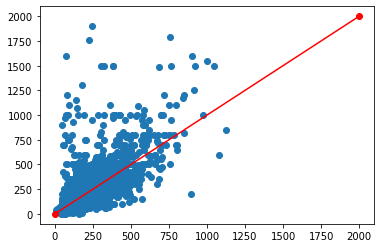

In [97]:
pred = pd.read_csv("output/prediction.csv")
merge_pred = pred.merge(overlap, on = "id")
print((((merge_pred.price - merge_pred.Predicted)**2).mean())**0.5)
plt.scatter(x=merge_pred.Predicted, y=merge_pred.price)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red");

In [26]:
import matplotlib.pyplot as plt

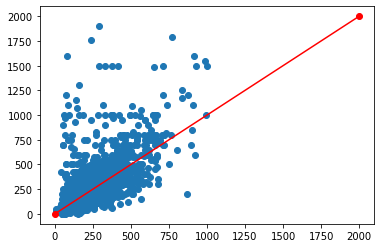

In [29]:
overlap[overlap["price"] > 1300]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price
154,2284454,MANHATTAN SUPERBOWL ACCOMODATION,We have 2 apartments available in the Upper Ea...,Ideal for a group coming to town for the super...,We have 2 apartments available in the Upper Ea...,none,"Upper East Side is a super safe area, packed w...",NaN,The apartments are a ten minute walk from the ...,"One double bed, one king size bed, 2 double so...",...,NaN,NaN,f,f,flexible,f,f,1,NaN,1600
956,20016493,"ART LOFT/HOME: DINNERS, GATHERINGS, PHOTO",This Noho Art Loft is fantastic for gatherings...,This Art loft is part of the Original Empire S...,This Noho Art Loft is fantastic for gatherings...,none,"Prime location steps from the best shops, rest...",Pricing will vary depending on purpose of the ...,This loft is conveniently located only one blo...,Guests have access to all parts of the space.,...,10.0,10.0,f,f,moderate,f,f,1,1.08,1795
2811,29486682,Loft Space with Incredible Windows,"Amazing Loft space in the middle of it all, ov...",NaN,"Amazing Loft space in the middle of it all, ov...",none,NaN,NaN,NaN,NaN,...,NaN,NaN,t,f,flexible,f,f,1,NaN,1500
3953,2250372,"Huge 3BR Penthouse, Private Roof!",Situated at the top of a brownstone townhouse ...,"We are proud to present a gorgeous 2,900 squar...",Situated at the top of a brownstone townhouse ...,none,The apartment is centrally located in Kips Bay...,Please contact me with any questions you may h...,The subway-proximate location makes getting ar...,Lower Level (1st Floor) •Master bedroom featur...,...,NaN,NaN,f,f,moderate,f,f,1,NaN,1550
5594,2186452,Tribeca Loft for Superbowl Wknd,Large Tribeca Loft available for Superbowl wee...,NaN,Large Tribeca Loft available for Superbowl wee...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,f,f,flexible,f,f,1,NaN,1500
5886,2276065,PERFECT SUPERBOWL STAY,"Located at 36th and 6th avenue in midtown, hal...","Beautiful, spacious & clean 1 bedroom in the m...","Located at 36th and 6th avenue in midtown, hal...",none,Near EVERYTHING.,NaN,"1,2,3,N,R,Q,B,D,F,N trains less than a block a...",Roof deck.,...,NaN,NaN,f,f,moderate,f,f,1,NaN,1500
7403,2261367,brooklyn 14 bedroom gated community,One of a kind in Brooklyn! A huge home it incl...,Our building is a legal hotel each room as a h...,One of a kind in Brooklyn! A huge home it incl...,none,Sea Gate is a hidden gem. In the summer the oc...,NaN,Public transportation is available outside the...,Small or big kitchen to be discussed. The full...,...,10.0,10.0,t,f,strict_14_with_grace_period,f,f,1,0.29,1485
8574,2250170,Spacious/New 3 Bedroom East Village,2 blocks from main subway line 10minute walk -...,NaN,2 blocks from main subway line 10minute walk -...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,f,f,flexible,f,f,1,NaN,1500
9366,1301321,West Village Penthouse-terrace/view,Penthouse with private terrace and amazing vie...,Private wraparound terrace on the top floor of...,Penthouse with private terrace and amazing vie...,none,NaN,NaN,NaN,NaN,...,10.0,9.0,f,f,strict_14_with_grace_period,f,f,1,0.32,1899
9784,6702693,"Clean modern 4BR/4.5Bath 6,000sf Loft Union Sq","This super clean, sunny, contemporary 6000sf l...",This space is quiet with CityQuiet double wind...,"This super clean, sunny, contemporary (Phone n...",none,"At the end of the block is a major subway hub,...",Full size laundry room with additional large f...,"The 4,5,6 trains are at the end of the block (...","We will greet you to give you keys, show you t...",...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,1,0.27,1495


In [48]:
test[test["square_feet"] > 500 ]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
140,27604010,New York city entire real 2 bedroom,I'm a California native living in NYC 16 years...,NaN,I'm a California native living in NYC 16 years...,none,NaN,NaN,closest to F train as well as the 4/5/6 trains.,NaN,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,2,0.87
157,715070,SPECTACULAR HOLIDAY RENTAL/VILLAGE,NaN,"LOCATION, LOCATION,LOCATION! Beautifully renov...","LOCATION, LOCATION,LOCATION! Beautifully renov...",none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
250,17298,Modern Brownstone living3,NaN,BROOKLYN BROWNSTONE TOWNHOUSE 3rd floor This 3...,BROOKLYN BROWNSTONE TOWNHOUSE 3rd floor This 3...,none,NaN,NaN,NaN,NaN,...,9.0,8.0,9.0,t,f,strict_14_with_grace_period,f,f,3,0.44
411,259946,"Budget stay, near transportation",NaN,A charming and cozy guest suite in an owner oc...,A charming and cozy guest suite in an owner oc...,none,"Safe & quiet residential neighborhood, across ...",NaN,"To Manhattan: Direct X-buses: X-4,5,7 & 8. 22 ...",NaN,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,4,0.09
673,722464,Large Private Room in Clinton Hill Brooklyn Loft,Large private bedroom in Loft Apartment. Locat...,The room is large and private. Furnished with ...,Large private bedroom in Loft Apartment. Locat...,none,The neighborhood boasts an array of restaurant...,Keys may be picked up at the Clementine Bakery...,Accessible from the G and C trains. Close and ...,Guests have access to a shared rooftop deck ju...,...,NaN,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15962,810681,City View From Brooklyn– 2Bd+2Bth,Great place for traveling families! Cozy livin...,This is our nice and spacious apartment in Cli...,Great place for traveling families! Cozy livin...,none,"Clinton Hill/ Frt. Greene is a historic area, ...",If you are visiting us in Winter we will do ou...,"Easy access to Trains (G,A,C,E,Q,R) or Taxi (a...","You will have access to all of our amenities, ...",...,10.0,8.0,9.0,t,f,strict_14_with_grace_period,f,f,1,0.03
16127,371138,"Comfy Brooklyn 2BD, W/ Backyard","A cozy retreat inside of Greenpoint, a true NY...",This apartment has two bedrooms with one queen...,"A cozy retreat inside of Greenpoint, a true NY...",none,Great relaxed neighborhood! Beautiful McGolric...,We have a dog! He won't be there while you are...,L train 15-20 min walk form our place G train ...,"Acess Is given to the whole place, except for ...",...,10.0,10.0,9.0,f,f,moderate,f,f,1,0.12
16243,1582263,Sunny Brooklyn apt for cat-lover!,NaN,A sunny and beautiful spacious one-bedroom apa...,A sunny and beautiful spacious one-bedroom apa...,none,NaN,NaN,NaN,NaN,...,10.0,9.0,9.0,f,f,flexible,f,f,1,0.39
16732,250537,The Lenox in Harlem,Luxury building in Harlem with a 24 hour doorm...,"This beautiful, spacious apartment is just 4 b...",Luxury building in Harlem with a 24 hour doorm...,none,NaN,NaN,NaN,All access to the apartment.,...,NaN,NaN,NaN,f,f,moderate,f,f,2,NaN


In [70]:
ring()